In [4]:
# Importando  bibliotecas do python
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

#Importando os arquivos
cadastro_df = pd.read_csv('cadastro - cadastro.csv')
gasolina_df = pd.read_csv('preco da gasolina - preco da gasolina.csv')
salario_df = pd.read_csv('salario_profissoes - salario_profissoes.csv')

cadastro_df['Quantidade'] = 1
cadastro_df['idade'] = 2020 - cadastro_df['ano_nascimento']

## 1- Qual a idade média das pessoas no cadastro
# Exibindo a média na tabela
print("Média é:",round(cadastro_df['idade'].sum() / cadastro_df['Quantidade'].sum(),2))


Média é: 32.73


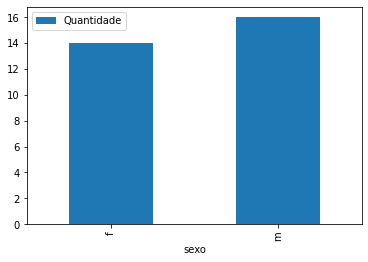

In [7]:
# 2- Quantos homens tem no cadastro ?
# 3- Quantas mulheres tem no cadastro?
cadastro_df[['sexo','Quantidade']].groupby('sexo').sum().plot(kind="bar")

In [17]:
# 4- Qual a idade média dos homens e das mulheres ?)
media_df = cadastro_df[['sexo','idade','Quantidade']].groupby('sexo').sum()
media_df['idade'] / media_df['Quantidade']

sexo
f    33.857143
m    31.750000
dtype: float64

C:\Users\gpimentel2\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


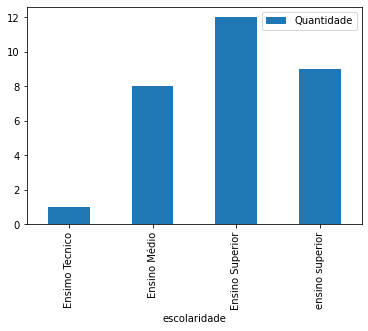

In [18]:
# 5- Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro?
cadastro_df["escolaridade"].loc[cadastro_df["escolaridade"] == "ensino médio"] = "Ensino Médio"
cadastro_df["escolaridade"].loc[cadastro_df["escolaridade"] == "ensino Médio"] = "Ensino Médio"
cadastro_df[['escolaridade','Quantidade']].groupby('escolaridade').sum().plot(kind="bar")

Média Salarial:  4463.33


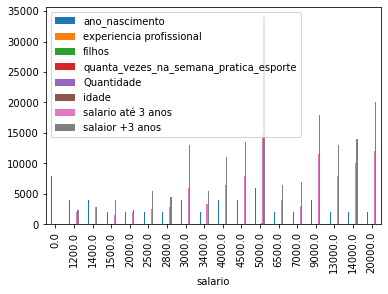

In [20]:
# 6- Mostre a Média Salarial do cadastro
df_salario_profionais = cadastro_df.merge(salario_df, left_on='profissão', right_on='Profissões')
df_salario_profionais['salario'] = df_salario_profionais["salario até 3 anos"].loc[df_salario_profionais["experiencia profissional"] <= 3]
df_salario_profionais['salario'] = df_salario_profionais['salario'].fillna(df_salario_profionais["salaior +3 anos"])
df_salario_profionais.groupby('salario').sum().plot(kind="bar")
print("Média Salarial: ",round(df_salario_profionais['salario'].sum() / cadastro_df['Quantidade'].sum(),2))

In [21]:
# 7- Quem tem o maior salário
maior_salario1 = max(df_salario_profionais["salario"])
df_salario_profionais.loc[df_salario_profionais["salario"] == maior_salario1]
print(maior_salario1)

20000.0


In [22]:
# 8 - Tirando desempregado quem recebe menos ?
salario_menor1 = min(df_salario_profionais["salario"].loc[df_salario_profionais["salario"] > 0])
df_salario_profionais.loc[df_salario_profionais["salario"] == salario_menor1]
print(salario_menor1)

1200.0


In [24]:
#9 - Quantas pessoas gostam de caminhar no final de semana?
pessoas_caminhar = cadastro_df["lazer_final_de_semana"].str.contains("caminhar").count()
print(f"Pessoas que caminham: {pessoas_caminhar}")

Pessoas que caminham: 30


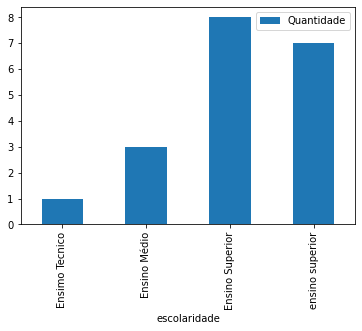

In [25]:
# 10- Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte
cadastro_df[['pratica_esporte','escolaridade','Quantidade']].loc[cadastro_df["pratica_esporte"] == 'sim'].groupby('escolaridade').sum().plot(kind="bar")

In [29]:
# 11- Crie um mapa de calor
import seaborn as sns

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_cadastro_salarios,
    x="experiencia profissional", y="idade",
    hue="filhos", size="salario_atual",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

NameError: name 'df_cadastro_salarios' is not defined

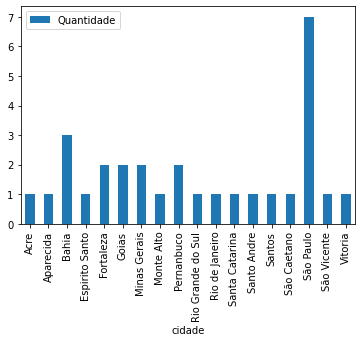

In [28]:
# 12- Mostre de forma gráfica a distribuição de estados do cadastro
cadastro_df[['cidade','Quantidade']].groupby('cidade').sum().plot(kind="bar")